<a href="https://colab.research.google.com/github/manuelfernandezdm/Machine_Learning_UNS/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebbok destinado a ejercicios de practica

## Aprendizaje supervisado:
Utilizare el dataset IRIS (flores) para tratar de modelar los datos, con el objetivo de predecir nuevos.

Importo las librerias que voy a utilizar:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   #para grafciar
import sklearn               #para los modelos
from sklearn.model_selection import train_test_split

In [ ]:
# Importo el dataset a un dataframe
data = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'   #enlace de github que contiene el dataset de IRIS (flores)
df = pd.read_csv(data)           #header = None: cuando el archivo no tiene nombre de las columnas.

In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


El objetivo es desarrollar un clasificador que pueda predecir que clase de flor es segun los valores de longitud y de ancho que le digamos de sus sepalos y petalos.

In [ ]:
df.shape

(150, 5)

In [ ]:
df.columns = ['long_sepalo', 'ancho_sepalo', 'long_petalo', 'ancho_petalo', 'variedad']
df.head()

,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo,variedad
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# Divido el data set en 2: una parte de entrenamiento y otra de testeo
X = df[['long_sepalo','ancho_sepalo','long_petalo','ancho_petalo']]   # matriz de atributos
y = df['variedad']    # matriz target

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_hat)

0.9777777777777777

In [ ]:
model.predict_proba(X_test).round(2)

Tratar de graficar el conjunto de datos sobre 2 ejes para poder visualizar mejor el comportamiento de manera grafica:

In [ ]:
df.corr(method='pearson')

,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo
long_sepalo,1.000000,-0.117570,0.871754,0.817941
ancho_sepalo,-0.117570,1.000000,-0.428440,-0.366126
long_petalo,0.871754,-0.428440,1.000000,0.962865
ancho_petalo,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:xlabel='ancho_sepalo', ylabel='ancho_petalo'>

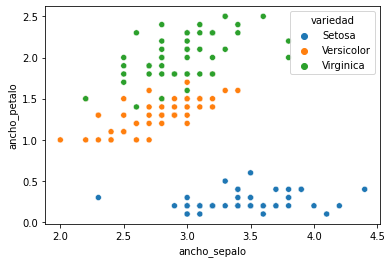

In [ ]:
sns.scatterplot(data=df, x=df['ancho_sepalo'], y=df['ancho_petalo'], hue=df['variedad'])

Probemos con K-Vecinos mas cercanos

Este modelo no se debe entrenar, solo calcula los puntos mas cercanos al nuevo y evalua por mayoria su clasificacion, dependiendo del parametro K del modelo.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

K = 5
model_knn = KNeighborsClassifier(n_neighbors=K)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_hat = model_knn.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_hat)

0.9777777777777777

El desempeño es el mismo que obtenemos con un clasificador Bayesiano

Probemos con un SVM a ver si podemos separar los puntos con un score del 100%

In [ ]:
from sklearn import svm

model_svm = svm.SVC(kernel='rbf')
model_svm.fit(X_train, y_train)

SVC()

In [ ]:
y_hat = model_svm.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_hat)

0.9666666666666667

Voy a probar con un aprendizaje no supervisado: Cluster con n=3 a ver que pasa

In [ ]:
from sklearn.cluster import KMeans

model_k_means = KMeans(init='k-means++', n_clusters=3, n_init=12)
model_k_means.fit(X_train)

KMeans(n_clusters=3, n_init=12)

<AxesSubplot:xlabel='ancho_petalo', ylabel='ancho_sepalo'>

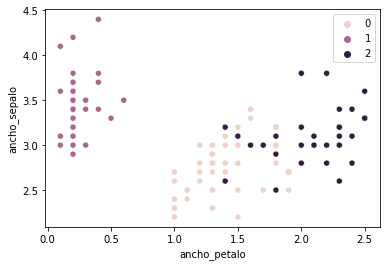

In [ ]:
labels = model_k_means.labels_
sns.scatterplot(data=X_train, x=X_train['ancho_petalo'], y=X_train['ancho_sepalo'], hue=labels )

<AxesSubplot:xlabel='ancho_petalo', ylabel='ancho_sepalo'>

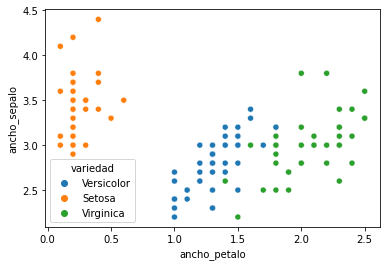

In [ ]:
sns.scatterplot(data=X_train, x=X_train['ancho_petalo'], y=X_train['ancho_sepalo'], hue=y_train )

In [ ]:
y_train.replace(to_replace=['Versicolor', 'Setosa', 'Virginica'], value=[0, 1, 2], inplace=True)
y_train[0:5]

84     0
47     1
108    2
1      1
93     0
Name: variedad, dtype: int64

In [ ]:
metrics.accuracy_score(y_train, labels)

0.9

In [ ]:
from sklearn.decomposition import PCA

model_pca = PCA(n_components=2)
model_pca.fit(X)
print (model_pca.components_)
print (model_pca.explained_variance_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
[4.22824171 0.24267075]


In [ ]:
x_pca = model_pca.transform(X)

In [ ]:
df_pca = pd.DataFrame(x_pca, columns = ['Column_A','Column_B'])

In [ ]:
df_pca.head()
df_pca['variedad'] = y

In [ ]:
df_pca.head()

,Column_A,Column_B,variedad
0,-2.684126,0.319397,Setosa
1,-2.714142,-0.177001,Setosa
2,-2.888991,-0.144949,Setosa
3,-2.745343,-0.318299,Setosa
4,-2.728717,0.326755,Setosa


<AxesSubplot:xlabel='Column_A', ylabel='Column_B'>

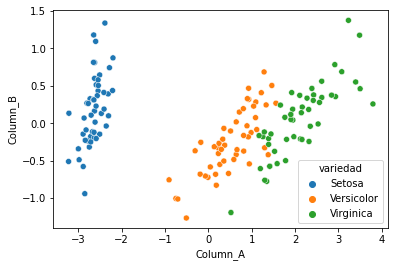

In [ ]:
sns.scatterplot(data=df_pca, x=df_pca['Column_A'], y=df_pca['Column_B'], hue=df_pca['variedad'])